<a href="https://colab.research.google.com/github/lukassso/python-mini-projects/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zaczynamy od zaimportowania pakietów i ich składowych.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('diabetes.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df[['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']] = df[['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']].replace(0, np.nan)
(df.isna()).sum() / len(df) * 100

,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


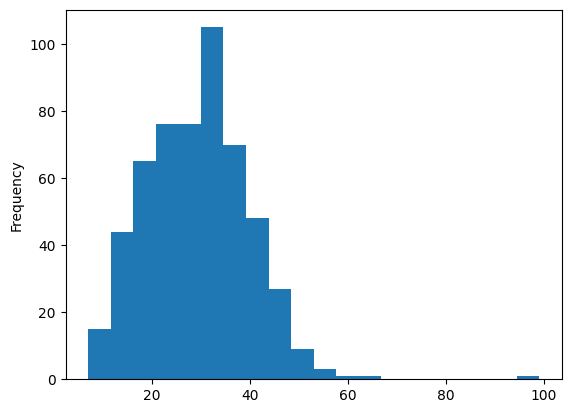

In [ ]:
df['SkinThickness'].plot(kind='hist', bins=20);

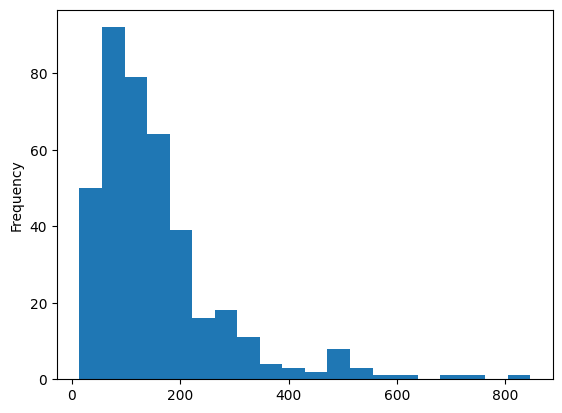

In [ ]:
df['Insulin'].plot(kind='hist', bins=20);

In [ ]:
df.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   BMI                       757 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 42.1 KB


In [ ]:
(df.isna()).sum() / len(df) * 100

,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,4.557292
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


In [ ]:
means = df[['Glucose', 'BloodPressure', 'BMI']].mean()
means

,0
Glucose,121.686763
BloodPressure,72.405184
BMI,32.457464


In [ ]:
df[['Glucose', 'BloodPressure', 'BMI']] = df[['Glucose', 'BloodPressure', 'BMI']].fillna(means)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 42.1 KB


In [ ]:
X = df.drop(columns='Outcome')
y = df['Outcome']
X.shape, y.shape

((768, 6), (768,))

In [ ]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
X_std.mean(axis=0), X_std.std(axis=0)

(array([-6.47630098e-17, -3.56196554e-16,  6.91576426e-16,  3.51570624e-16,
         2.45174251e-16,  1.93132547e-16]),
 array([1., 1., 1., 1., 1., 1.]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 6), (154, 6), (614,), (154,))

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
sv0 = SVC(C=100.0, kernel='linear')
sv1 = SVC()
lr = LogisticRegression()
nb = GaussianNB()
models = (dt, sv0, sv1, lr, nb)

In [ ]:
y_train_preds = []
y_test_preds = []
for model in models:
    model.fit(X_train, y_train)
    y_train_preds.append(model.predict(X_train))
    y_test_preds.append(model.predict(X_test))

In [ ]:
train_scores = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'])
for m in range(len(models)):
    y_pred = y_train_preds[m]
    train_scores.loc[len(train_scores)] = [accuracy_score(y_train, y_pred),
                                           precision_score(y_train, y_pred),
                                           recall_score(y_train, y_pred),
                                           f1_score(y_train, y_pred)]
train_scores.set_index(pd.Index(['Decision Tree', 'SVC (linear)', 'SVC (RBF)',
                                 'Logistic Regression', 'Naive Bayes']))

,Accuracy,Precision,Recall,F1
Decision Tree,0.775244,0.711111,0.598131,0.649746
SVC (linear),0.767101,0.717791,0.546729,0.620690
SVC (RBF),0.812704,0.792899,0.626168,0.699739
Logistic Regression,0.768730,0.709302,0.570093,0.632124
Naive Bayes,0.760586,0.673575,0.607477,0.638821


In [ ]:
test_scores = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'])
for m in range(len(models)):
    y_pred = y_test_preds[m]
    test_scores.loc[len(test_scores)] = [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred)]
test_scores.set_index(pd.Index(['Decision Tree', 'SVC (linear)', 'SVC (RBF)',
                                'Logistic Regression', 'Naive Bayes']))

,Accuracy,Precision,Recall,F1
Decision Tree,0.779221,0.717391,0.611111,0.660000
SVC (linear),0.772727,0.743590,0.537037,0.623656
SVC (RBF),0.785714,0.769231,0.555556,0.645161
Logistic Regression,0.779221,0.727273,0.592593,0.653061
Naive Bayes,0.772727,0.693878,0.629630,0.660194


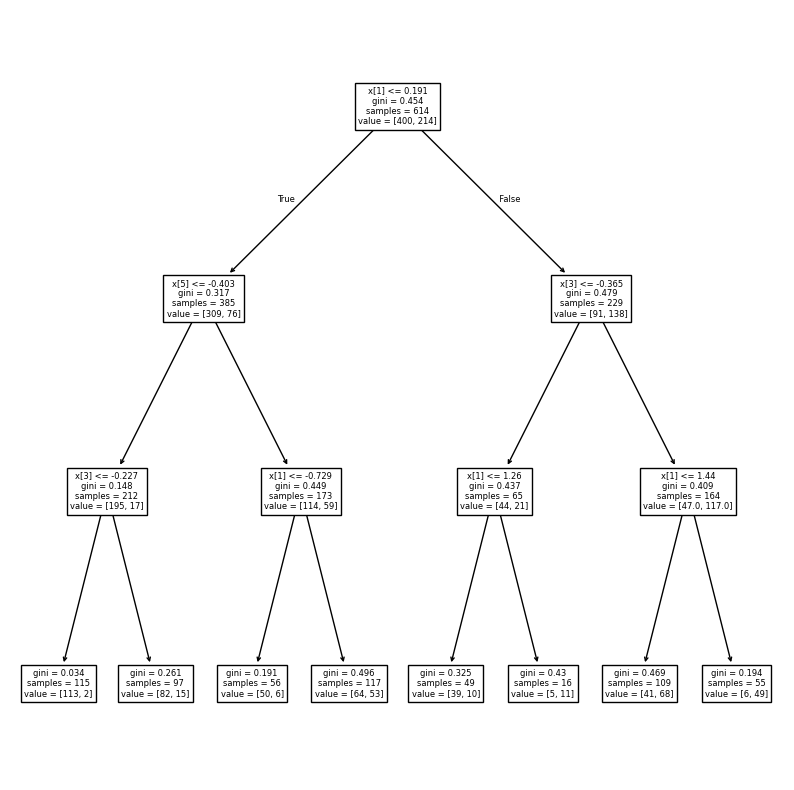

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plot_tree(dt);

In [ ]:
y_pred = y_test_preds[2]
cm_sv1 = confusion_matrix(y_test, y_pred)
cm_sv1

array([[91,  9],
       [24, 30]])

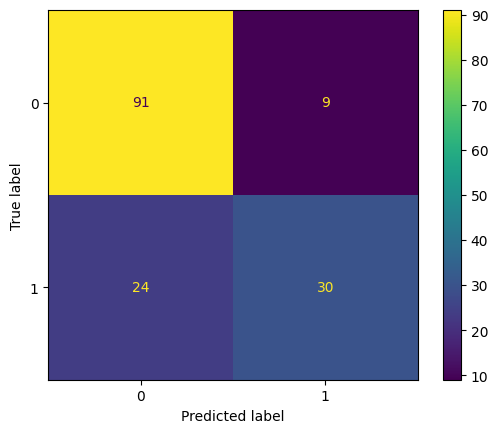

In [ ]:
ConfusionMatrixDisplay(cm_sv1).plot();

In [ ]:
pmodels = (lr, nb)
y_train_probs = []
y_test_probs = []
for m in pmodels:
    y_train_probs.append(m.predict_proba(X_train)[:, 1])
    y_test_probs.append(m.predict_proba(X_test)[:, 1])

In [ ]:
auc_scores = pd.DataFrame(columns=['AUC (train)', 'AUC (test)'])
for m in range(len(pmodels)):
    auc_scores.loc[len(auc_scores)] = [roc_auc_score(y_train, y_train_probs[m]),
                                       roc_auc_score(y_test, y_test_probs[m])]
auc_scores.set_index(pd.Index(['Logistic Regression', 'Naive Bayes']))

,AUC (train),AUC (test)
Logistic Regression,0.840596,0.852963
Naive Bayes,0.824404,0.850185


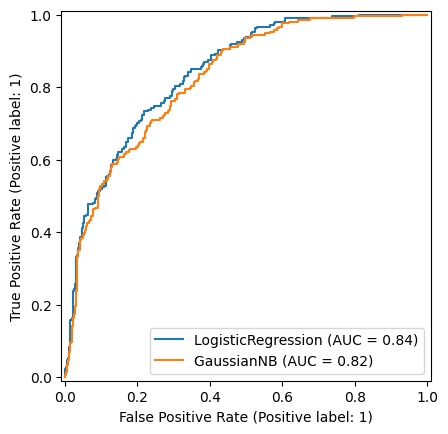

In [ ]:
rcd = RocCurveDisplay.from_estimator(lr, X_train, y_train)
RocCurveDisplay.from_estimator(nb, X_train, y_train, ax = rcd.ax_);

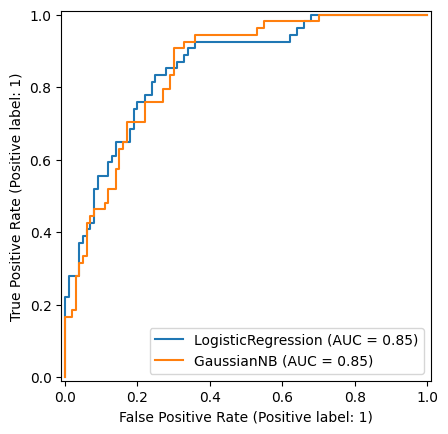

In [ ]:
rcd = RocCurveDisplay.from_estimator(lr, X_test, y_test)
RocCurveDisplay.from_estimator(nb, X_test, y_test, ax = rcd.ax_);